# Car Data Analysis

This notebook contains a comprehensive analysis of the car dataset.

## Importing Libraries

In [57]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

## Load the dataset

In [58]:
# Load dataset
file_path = 'cars-germany-dataset.csv'
data = pd.read_csv(file_path)

## Display basic dataset information

In [59]:
data.head()
#data.shape
#data.info()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


## Check missing values in each column

In [60]:
print("\nPercentage of Missing Values per Column:")
for col in data.columns:
    percent_missing = np.mean(data[col].isnull())
    print(f'{col}: {round(percent_missing * 100, 2)}%')


Percentage of Missing Values per Column:
mileage: 0.0%
make: 0.0%
model: 0.31%
fuel: 0.0%
gear: 0.39%
offerType: 0.0%
price: 0.0%
hp: 0.06%
year: 0.0%


## Data Cleaning: Removing duplicates and dropping rows with missing values

In [61]:
data = data.dropna()
data = data.drop_duplicates()

## Check missing values in each column after cleaning

In [62]:
print("\nPercentage of Missing Values After Cleaning:")
for col in data.columns:
    percent_missing = np.mean(data[col].isnull())
    print(f'{col}: {round(percent_missing * 100, 2)}%')


Percentage of Missing Values After Cleaning:
mileage: 0.0%
make: 0.0%
model: 0.0%
fuel: 0.0%
gear: 0.0%
offerType: 0.0%
price: 0.0%
hp: 0.0%
year: 0.0%


## 1. Distribution of Prices

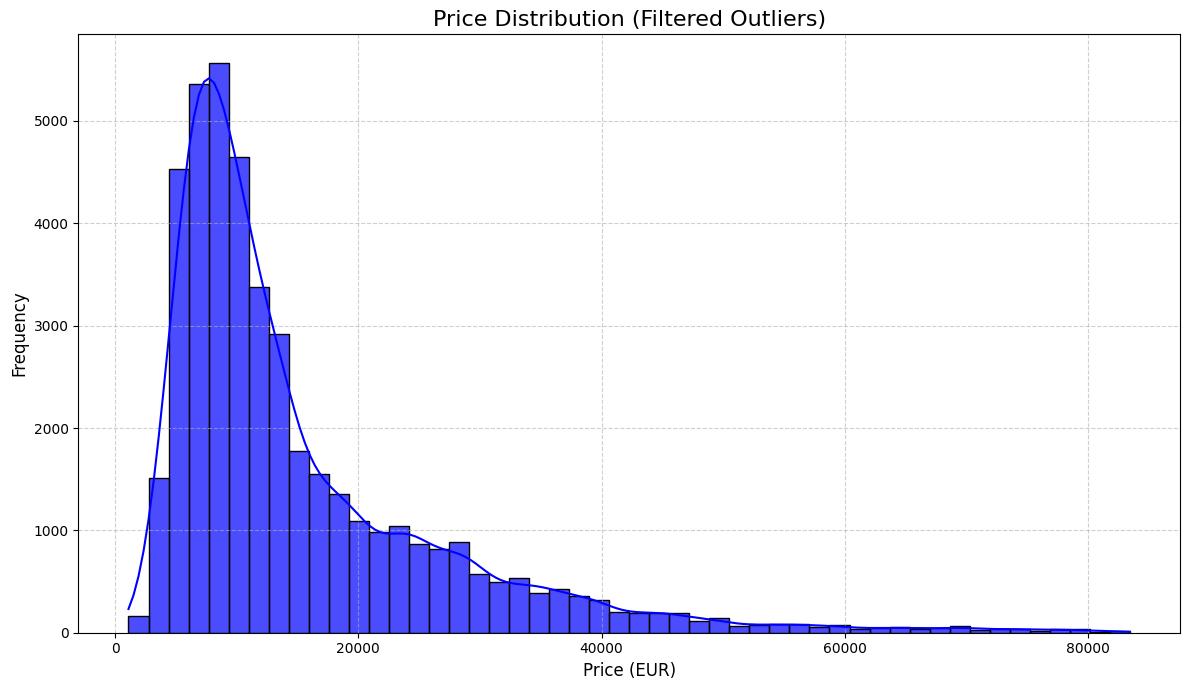

In [63]:
# Remove extreme outliers for better visualization
price_filtered = data['price'][data['price'] < data['price'].quantile(0.99)]  # Remove top 1% of prices
# Plot distribution of prices
plt.figure(figsize=(12, 7))  # Larger plot for readability
sns.histplot(price_filtered, bins=50, kde=True, color='blue', alpha=0.7)
plt.title('Price Distribution (Filtered Outliers)', fontsize=16)
plt.xlabel('Price (EUR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Insights from the Price Distribution

1. **Skewed Distribution**: The price distribution is right-skewed, with the majority of cars priced between **€5,000 and €15,000**.
2. **Rare High Prices**: High-priced cars are uncommon, forming a **long tail** in the distribution.
3. **Filtered Outliers**: The top **1% of prices** were filtered to better represent the majority of the market.
4. **Affordable Market**: The data suggests the market is dominated by **affordable and mid-range cars**.

## 2. Distribution of Mileage

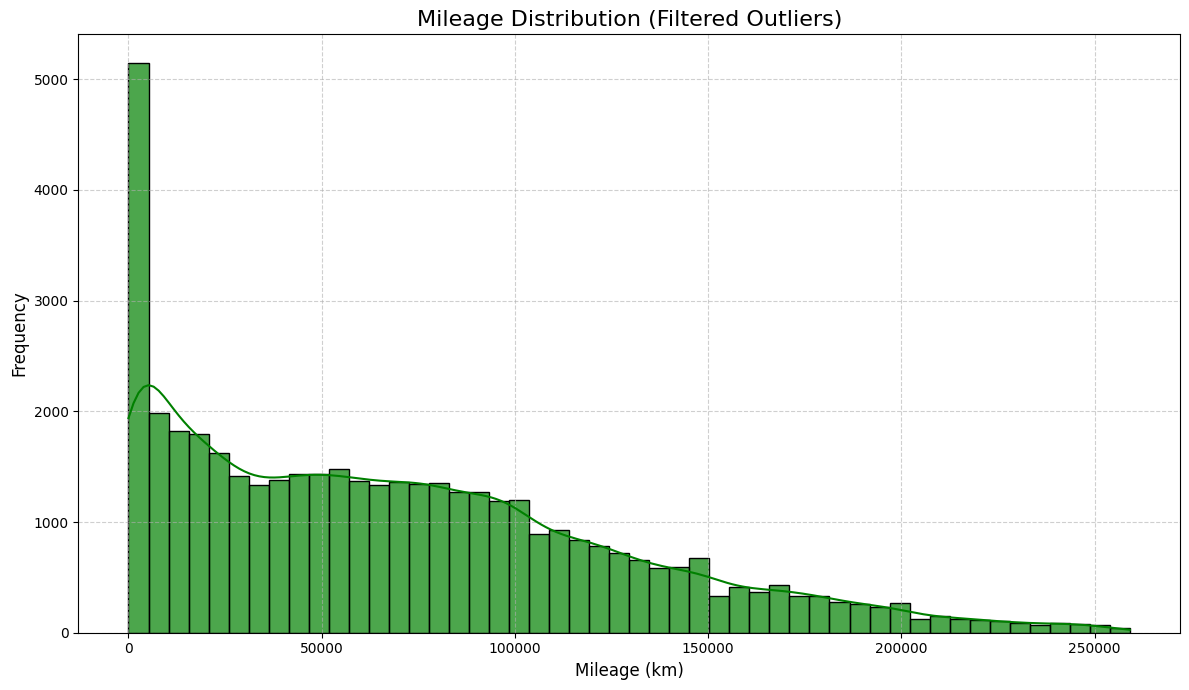

In [64]:
# Remove extreme outliers for better visualization (optional)
mileage_filtered = data['mileage'][data['mileage'] < data['mileage'].quantile(0.99)]  # Remove top 1% of mileage
# Plot distribution of mileage
plt.figure(figsize=(12, 7))  # Larger plot for better readability
sns.histplot(mileage_filtered, bins=50, kde=True, color='green', alpha=0.7)
plt.title('Mileage Distribution (Filtered Outliers)', fontsize=16)
plt.xlabel('Mileage (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()   

### Insights from the Mileage Distribution

1. **Skewed Distribution**: The mileage distribution is right-skewed, with most cars having a mileage below **50,000 km**.
2. **High Frequency at Low Mileage**: A significant number of cars have very low mileage, as indicated by the peak near **0 km**.
3. **Gradual Decline**: The frequency of cars decreases steadily as mileage increases, with very few cars exceeding **200,000 km**.
4. **Filtered Outliers**: The data has been filtered to exclude the top **1% of mileage values**, focusing on the majority of cars.
5. **Market Implication**: The high number of low-mileage cars suggests a strong market for relatively newer or lightly used vehicles.

## 3. Popularity of Fuel Types

C:\Users\kacpe\AppData\Local\Temp\ipykernel_10916\14645497.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='viridis')


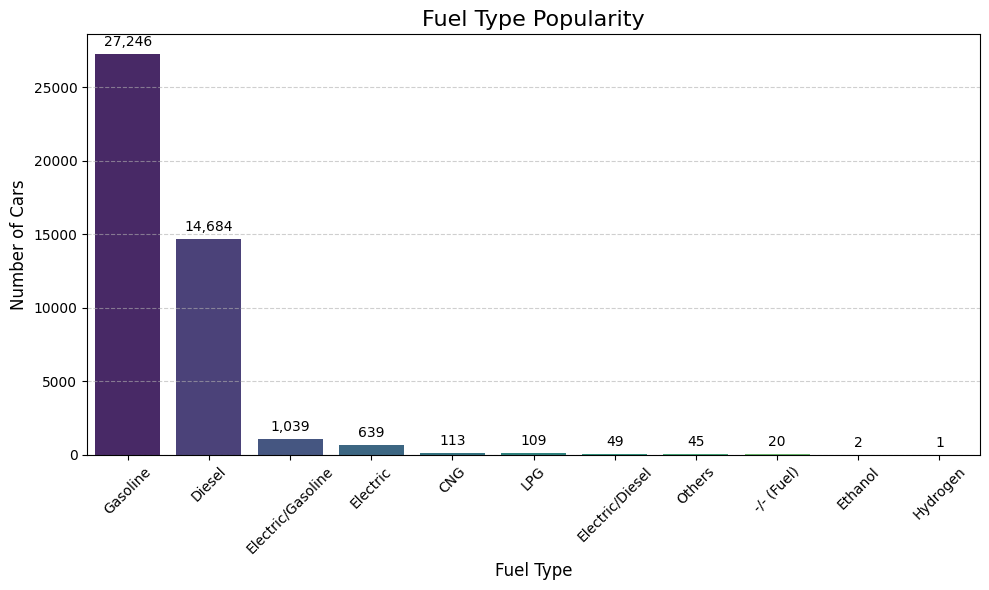

In [65]:
# Calculate fuel type counts and sort by popularity
fuel_counts = data['fuel'].value_counts()
# Plot fuel type popularity
plt.figure(figsize=(10, 6))  # Slightly wider figure for better readability
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette='viridis')
# Annotate bar values
for i, count in enumerate(fuel_counts.values):
    plt.text(i, count + fuel_counts.max() * 0.02, f'{count:,}', ha='center', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.title('Fuel Type Popularity', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Grid only for Y-axis
plt.tight_layout()
plt.show()   

### Insights from the Fuel Type Popularity Chart
1. **Dominance of Gasoline and Diesel**:  
   - Gasoline-powered cars are the most common, accounting for **27,246** vehicles.  
   - Diesel-powered cars follow with **14,684** vehicles, making these two fuel types the overwhelming majority in the dataset.
2. **Alternative Fuel Types are Rare**:  
   - Electric/Gasoline cars (1,039) and Electric cars (639) are present but constitute a small portion of the total.  
   - Other fuel types like CNG, LPG, and Electric/Diesel have very low representation, each below **120 vehicles**.
3. **Niche Categories**:  
   - Categories such as Ethanol, Hydrogen, and "- / (Fuel)" have extremely minimal representation, with counts below **50 vehicles**.
4. **Market Trend**:  
   - The dominance of traditional fuel types (Gasoline and Diesel) suggests a market heavily reliant on conventional internal combustion engines.  
   - The low numbers of alternative fuel types indicate a limited presence of hybrid and electric vehicles in this dataset.

## 4. Price by Manufacturer

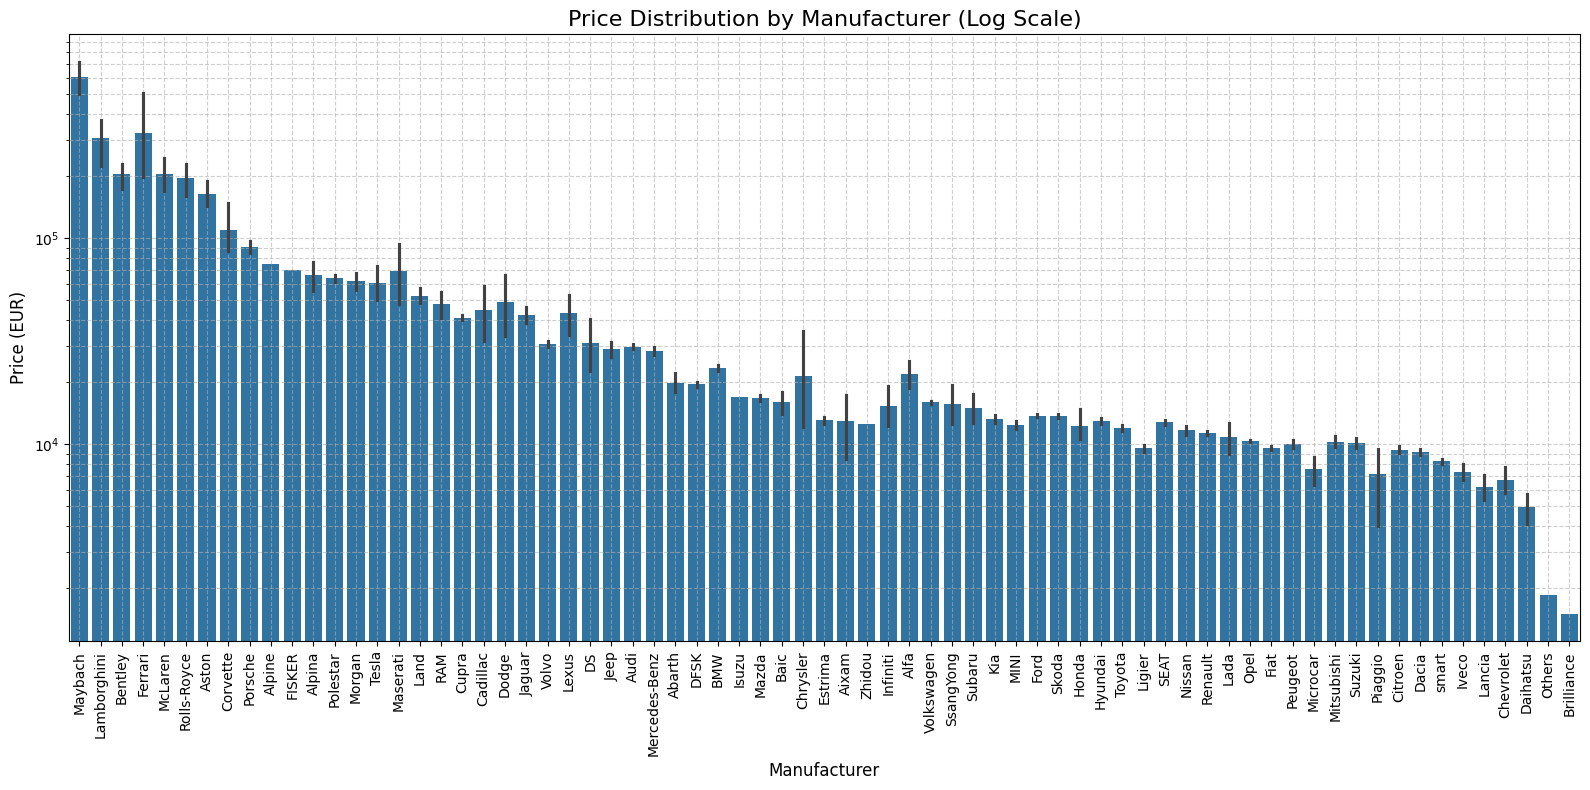

In [66]:
# Calculate median prices by manufacturer and sort them in descending order
sorted_makes = data.groupby('make')['price'].median().sort_values(ascending=False).index
# Plot price distribution by manufacturer with log scale
plt.figure(figsize=(16, 8))
sns.barplot(x='make', y='price', data=data, order=sorted_makes)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Price Distribution by Manufacturer (Log Scale)', fontsize=16)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Price (EUR)', fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Insights from the Price Distribution by Manufacturer (Log Scale)
1. **High-End Brands Lead in Prices**:  
   - Luxury manufacturers such as **Maybach, Lamborghini, Bentley, and Ferrari** have the highest median prices, reflecting their premium market positioning.
2. **Wide Range of Prices**:  
   - The log scale emphasizes the significant variation in prices across manufacturers, with some brands, like **Brilliance** and **Others**, having notably lower prices.
3. **Mid-Range Manufacturers**:  
   - Brands such as **Volkswagen, Toyota, and Ford** occupy the mid-range, suggesting their focus on affordable or mass-market vehicles.
4. **Price Distribution within Manufacturers**:  
   - The error bars indicate variability in prices within each manufacturer, with some luxury brands (e.g., **Tesla** and **Porsche**) showing broader price ranges due to diverse model lineups.
5. **Market Trends**:  
   - The data highlights a distinct segmentation of the automotive market, where a small number of luxury brands dominate the high-price segment, while the majority of manufacturers focus on more affordable vehicles.

## 5. Price vs Horsepower

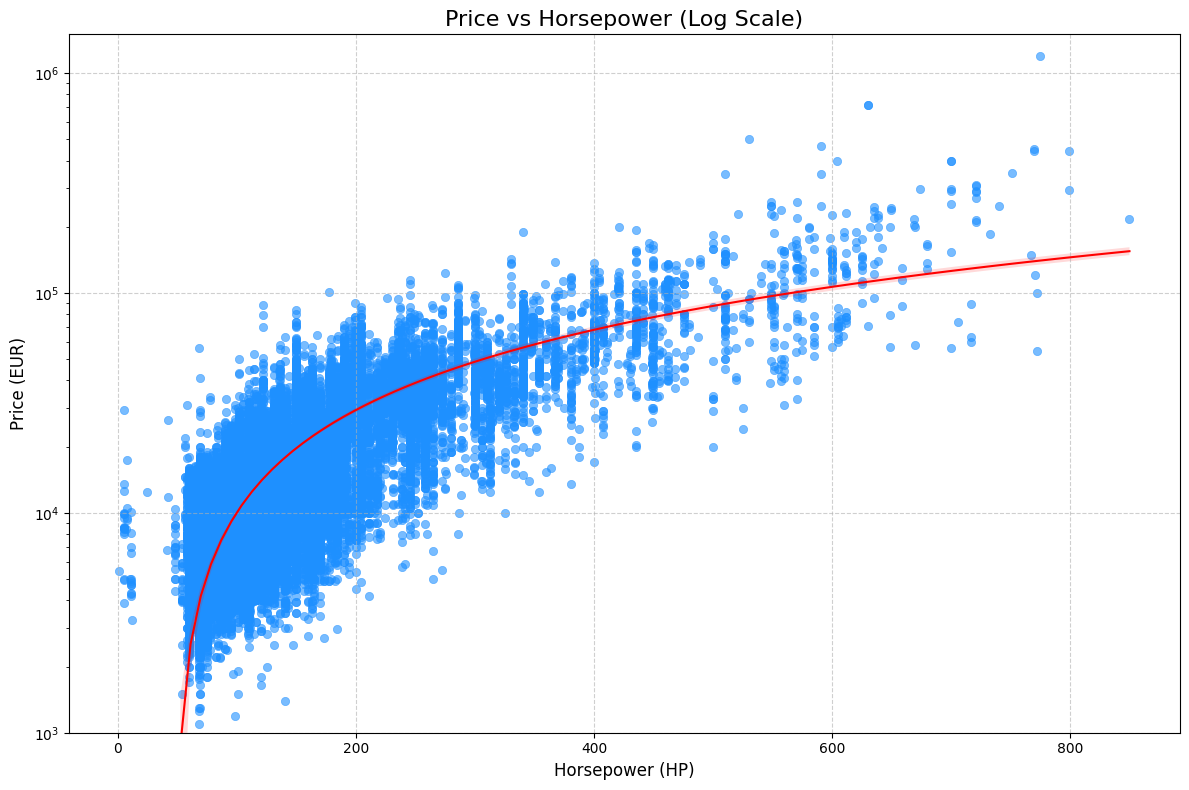

In [67]:
# Scatter plot: Price vs Horsepower
plt.figure(figsize=(12, 8))
sns.scatterplot(x='hp', y='price', data=data, alpha=0.6, edgecolor=None, color='dodgerblue')
sns.regplot(x='hp', y='price', data=data, scatter=False, color='red', line_kws={"linewidth": 1.5})
plt.yscale('log')
plt.title('Price vs Horsepower (Log Scale)', fontsize=16)
plt.xlabel('Horsepower (HP)', fontsize=12)
plt.ylabel('Price (EUR)', fontsize=12)
plt.ylim(1000,1500000)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() 

### Insights from the Price vs Horsepower Plot (Log Scale)
1. **Positive Correlation**:
   - There is a clear positive correlation between **horsepower (HP)** and **price**, indicating that cars with higher horsepower tend to be more expensive.
2. **Non-linear Relationship**:
   - The trendline (red) suggests a non-linear relationship, where price increases at a diminishing rate as horsepower rises.
3. **Price Variability**:
   - For lower horsepower values (below 200 HP), the price variability is significant, indicating a wide range of prices for cars in this category.
   - For higher horsepower values (above 400 HP), the prices are generally higher, with fewer outliers.
4. **Log Scale Effect**:
   - The log scale highlights differences across a wide range of prices and horsepower, making it easier to observe trends and relationships in the data.
5. **Market Trend**:
   - The chart suggests that manufacturers focus on offering a variety of cars with low-to-medium horsepower at varying price points, while high-horsepower cars are limited to premium and luxury segments.

## 6. Price by Gear Type

C:\Users\kacpe\AppData\Local\Temp\ipykernel_10916\3938646320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gear', y='price', data=data, order=sorted_gears, palette='Set2')


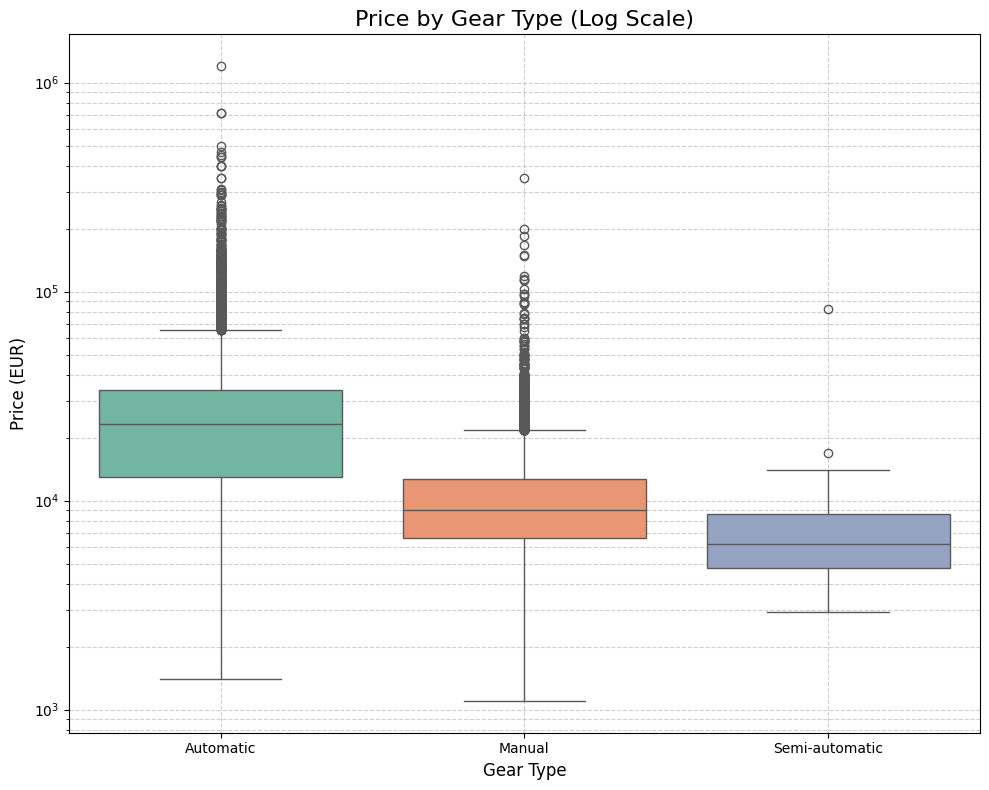

In [68]:
# Sort gear types by median price
sorted_gears = data.groupby('gear')['price'].median().sort_values(ascending=False).index
# Boxplot: Price by Gear Type
plt.figure(figsize=(10, 8))  # Slightly larger for better readability
sns.boxplot(x='gear', y='price', data=data, order=sorted_gears, palette='Set2')
plt.yscale('log')
plt.title('Price by Gear Type (Log Scale)', fontsize=16)
plt.xlabel('Gear Type', fontsize=12)
plt.ylabel('Price (EUR)', fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Insights from the Price by Gear Type Plot (Log Scale)
1. **Median Price Differences**:
   - Cars with **automatic transmission** have the highest median price, followed by **semi-automatic**, while **manual transmission** cars are generally the most affordable.
2. **Price Variability**:
   - **Automatic transmission** cars exhibit the widest price range, reflecting their presence in both luxury and non-luxury segments.
   - **Manual transmission** cars have a narrower price range, consistent with their prevalence in more affordable and utility-focused vehicles.
   - **Semi-automatic transmission** cars show a moderate price range, possibly due to their niche presence.
3. **Outliers**:
   - All gear types exhibit high-price outliers, with **automatic transmission** showing the most extreme values, likely from luxury and high-performance vehicles.
4. **Log Scale Effect**:
   - The log scale helps highlight the differences in median prices and price distributions across the gear types while accommodating the wide range of values.
5. **Market Insights**:
   - The data indicates a segmentation where **manual transmissions** dominate the lower-price market, while **automatic transmissions** cater to a broader spectrum, including premium and luxury vehicles.

## 7. Correlation Matrix

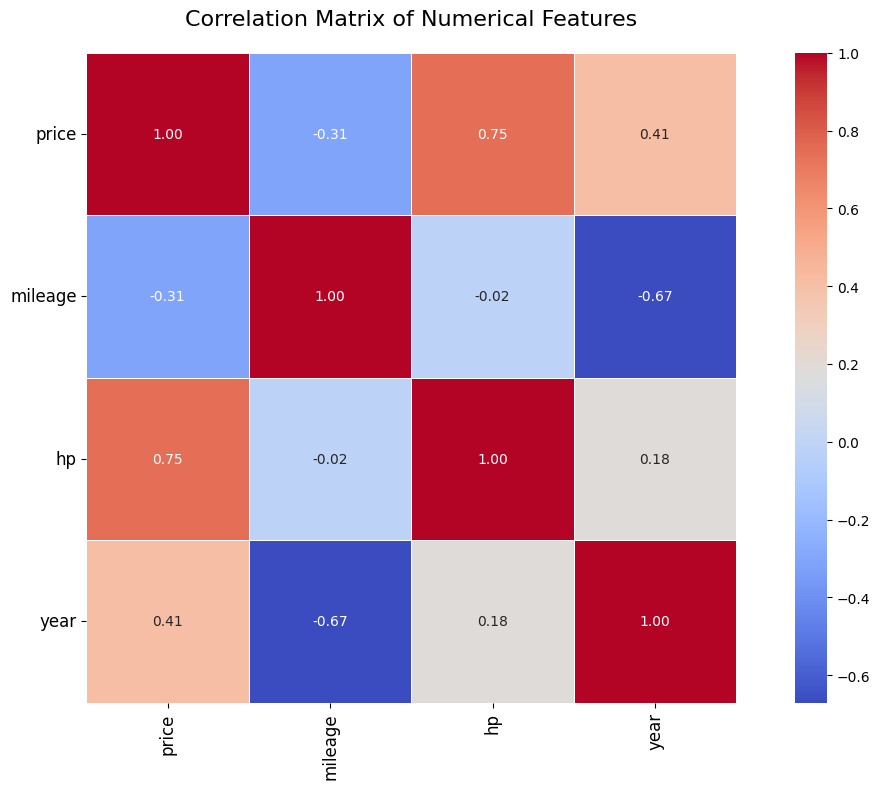

In [69]:
# Compute correlation matrix
cleaned_data = data[['price', 'mileage', 'hp', 'year']].dropna()
correlation_matrix = cleaned_data.corr()
# Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    square=True, 
    linewidths=0.5,
    annot_kws={"size": 10}
)
plt.title("Correlation Matrix of Numerical Features", fontsize=16, pad=20)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()   

### Insights from the Correlation Matrix of Numerical Features
1. **Strong Positive Correlation**:
   - **Price** and **horsepower (hp)** show a strong positive correlation (**0.75**), indicating that cars with higher horsepower tend to be more expensive.
2. **Negative Correlation**:
   - **Mileage** and **price** have a moderate negative correlation (**-0.31**), suggesting that cars with higher mileage are generally less expensive.
   - **Mileage** and **year** exhibit a strong negative correlation (**-0.67**), implying that newer cars tend to have lower mileage.
3. **Weak Correlations**:
   - **Horsepower (hp)** and **mileage** have a near-zero correlation (**-0.02**), indicating no significant relationship between these two variables.
   - **Year** and **horsepower (hp)** have a weak positive correlation (**0.18**), suggesting that newer cars might have slightly higher horsepower.
4. **Key Observations**:
   - The strongest predictor of price in this dataset appears to be **horsepower**.
   - Mileage and year show expected trends, where newer cars with lower mileage tend to be priced higher.